In [3]:
from modules.diffusion import ContextUnet, DDPM
import numpy as np
import pytorch_lightning as pl
from torchvision.datasets import MNIST, ImageFolder
from torch.utils.data import DataLoader
from torchvision import models, transforms
from pytorch_lightning.loggers import TensorBoardLogger

%load_ext autoreload
%autoreload 2
# %load_ext tensorboard
# %tensorboard --logdir lightning_logs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Global seed set to 42
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type        | Params
-----------------------------------------
0 | nn_model | ContextUnet | 6.6 M 
1 | loss_mse | MSELoss     | 0     
-----------------------------------------
6.6 M     Trainable params
0         Non-trainable params
6.6 M     Total params
26.332    Total estimated model params size (MB)


Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

saved model at ../data/diffusion_outputs10/model_0.pth


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

saved model at ../data/diffusion_outputs10/model_10.pth


Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

/home/guo/anaconda3/envs/ldm/lib/python3.8/site-packages/pytorch_lightning/trainer/trainer.py:1047: UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")


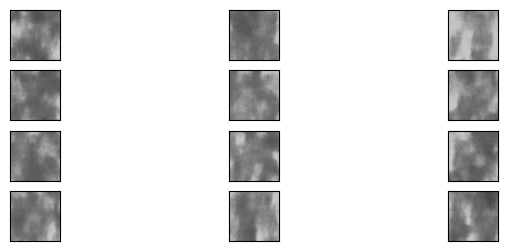

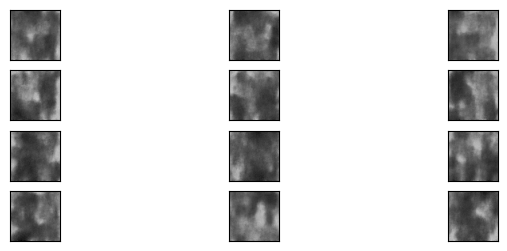

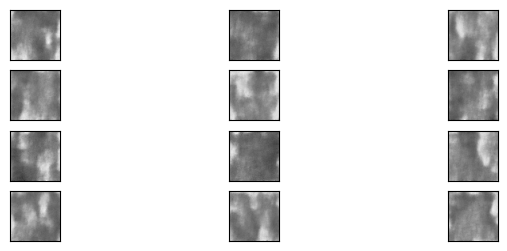

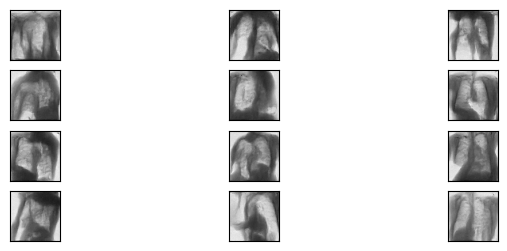

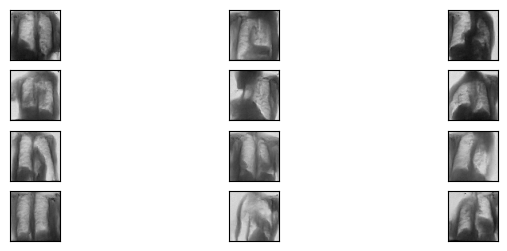

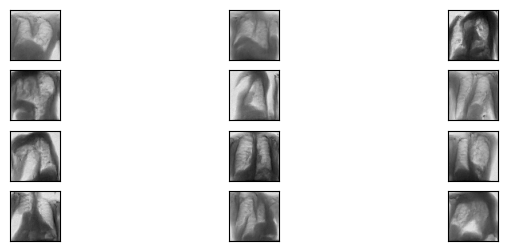

In [4]:
n_epoch = 100
n_T = 400 # 500
device = "cuda:0"
n_classes = 3
n_feat = 128 # 128 ok, 256 better (but slower)
image_size = 64
lrate = 1e-4
batch_size = 32
save_model = False
save_dir = '../data/diffusion_outputs10/'
ws_test = [0.0, 0.5, 2.0] # strength of generative guidance
pl.seed_everything(42)
tf = transforms.Compose([transforms.ToTensor(), transforms.Resize((image_size, image_size)), transforms.Grayscale(), transforms.Normalize((0.5,), (0.5,))])
dataset_train = ImageFolder('../data/xray_train', transform=tf)
dataset_val = ImageFolder('../data/xray_val', transform=tf)

dataloader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True, num_workers=5)
dataloader_val = DataLoader(dataset_val, batch_size=300, shuffle=False, num_workers=5)

logger = TensorBoardLogger('tb_logs', name='my_model')

model = DDPM(nn_model=ContextUnet(in_channels=1, n_feat=n_feat, n_classes=n_classes), betas=(1e-4, 0.02), n_T=n_T, device=device, drop_prob=0.1, epochs=n_epoch, image_size=image_size)
trainer = pl.Trainer(gpus=1, max_epochs=n_epoch, num_sanity_val_steps=0, logger=logger)
trainer.fit(model, dataloader_train, dataloader_val)

# #plot data
# import matplotlib.pyplot as plt
# import torchvision

# plt.imshow(dataset_train[0][0][0], cmap='gray')
# torchvision.utils.save_image(dataset_train[0][0], 'test.png', )